In [198]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [199]:
class data_assessment(object):
    # parse basic statistical properties of data
    def __init__(self, filepath):
        self.filepath = filepath
        self.df = pd.read_csv(self.filepath)

    @property
    def data_info(self):
        return df.info()
    
    @property
    def split_time(self):
        prefix = pd.DatetimeIndex(self.df['Date'])
        self.df['Year'] = prefix.year
        self.df['Month'] = prefix.month
        self.df['Day'] = prefix.day
        return self.df, self.df['Date']

Let's Plot All time Series and with March 1 as the vertical line to show COVID

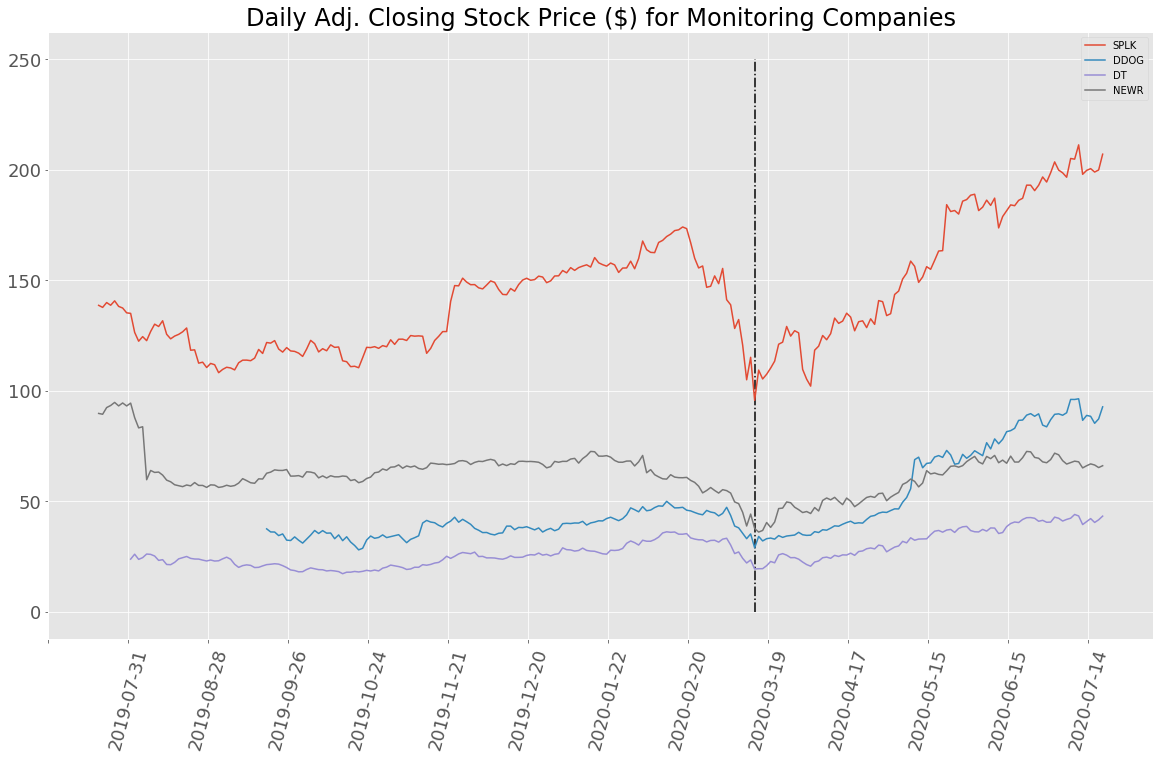

In [241]:
fig, ax = plt.subplots(figsize=(16, 10))
filepaths = list(['../data/SPLK.csv', '../data/DDOG.csv', '../data/DT.csv', '../data/NEWR.csv'])
for filepath in filepaths:
    data_frame, date = data_assessment(filepath).split_time
    data_frame = data_frame.set_index('Date')
    ax.plot(data_frame.index.values, data_frame["Adj Close"], label=filepath.split('/')[-1][:-4])

# data_frame.reset_index()
ax.vlines(164, 0, 250, colors='k', linestyles='dashdot')
ax.legend(loc='best');
ax.set_title('Daily Adj. Closing Stock Price ($) for Monitoring Companies', fontsize=24);
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 20));
ax.xaxis.set_tick_params(rotation=75)
fig.tight_layout()
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)

#### Test Statistics
* Take difference shift(-1)
* Take 120 difference points after covid and 120 before covid
* Compute mean and stardard deviation of the before and after data and run a p test

In [275]:
data_frame['Diff'] = data_frame['Adj Close'] - data_frame['Adj Close'].shift(1)
data_frame

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Diff
0,2019-07-22,139.059998,139.910004,138.300003,138.699997,138.699997,846300,2019,7,22,NaN
1,2019-07-23,139.080002,139.440002,136.220001,137.770004,137.770004,843700,2019,7,23,-0.929993
2,2019-07-24,137.350006,140.149994,136.630005,139.960007,139.960007,937000,2019,7,24,2.190003
3,2019-07-25,139.820007,139.889999,137.809998,138.740005,138.740005,1071300,2019,7,25,-1.220002
4,2019-07-26,139.770004,142.059998,139.429993,140.729996,140.729996,1089500,2019,7,26,1.989991
...,...,...,...,...,...,...,...,...,...,...,...
247,2020-07-14,198.369995,200.899994,190.479996,199.779999,199.779999,1957600,2020,7,14,1.779999
248,2020-07-15,200.389999,201.970001,196.229996,200.559998,200.559998,1099400,2020,7,15,0.779999
249,2020-07-16,197.839996,199.880005,195.330002,199.020004,199.020004,1063400,2020,7,16,-1.539994
250,2020-07-17,198.899994,201.500000,197.410004,199.970001,199.970001,946500,2020,7,17,0.949997


In [304]:
filepaths = list(['../data/SPLK.csv', '../data/DDOG.csv', '../data/DT.csv', '../data/NEWR.csv'])
before_after_dict = dict()
statistics = dict()

for filepath in filepaths:
    data_frame, _ = data_assessment(filepath).split_time
    data_frame['Diff'] = data_frame['Adj Close'] - data_frame['Adj Close'].shift(1)
    before_data_frame = data_frame[-200:-100]
    after_data_frame = data_frame[-100:]
    before_after_dict[filepath.split('/')[-1][:-4]] = {'before': before_data_frame['Diff'],\
                                   'after': after_data_frame[-100:]['Diff']}
    statistics[filepath.split('/')[-1][:-4]] = {'before': {'mean': round(before_data_frame['Diff'].mean(),3), \
                                                          'std': round(before_data_frame['Diff'].std(), 3)},
                                              
                                                'after': {'mean': round(after_data_frame['Diff'].mean(), 3), \
                                                          'std': round(after_data_frame['Diff'].std(), 3)},
                                              } 

In [305]:
pd.DataFrame(statistics)

,SPLK,DDOG,DT,NEWR
before,"{'mean': 0.409, 'std': 2.982}","{'mean': 0.128, 'std': 1.463}","{'mean': 0.144, 'std': 0.816}","{'mean': -0.071, 'std': 1.406}"
after,"{'mean': 0.506, 'std': 6.492}","{'mean': 0.489, 'std': 2.792}","{'mean': 0.107, 'std': 1.432}","{'mean': 0.123, 'std': 2.243}"


In [308]:
statistics['SPLK']['after']['mean']

0.506

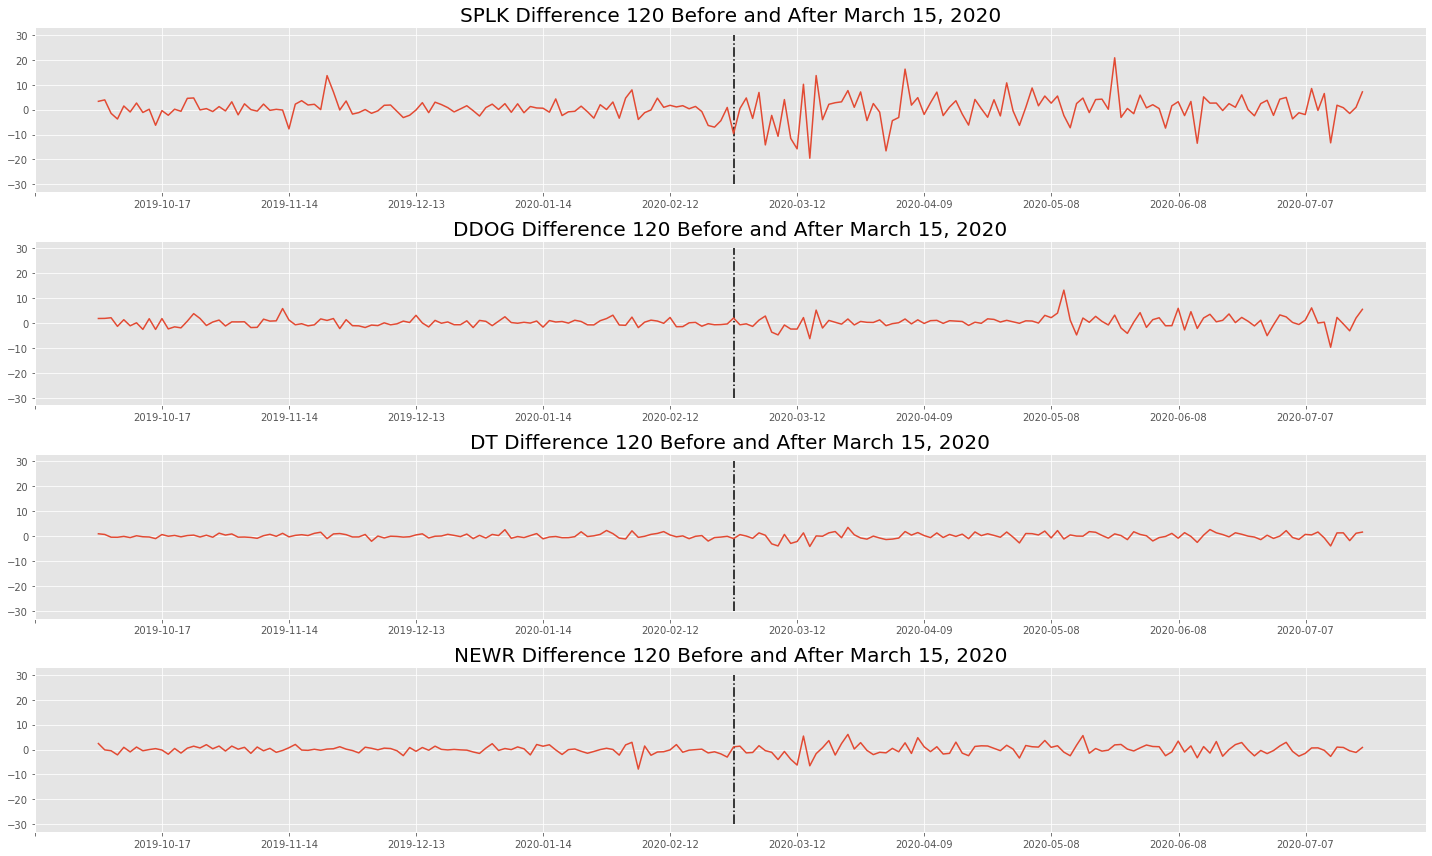

In [332]:
fig, axs = plt.subplots(4, 1, figsize=(20, 12))

filepaths = list(['../data/SPLK.csv', '../data/DDOG.csv', '../data/DT.csv', '../data/NEWR.csv'])
for filepath, ax  in zip(filepaths, axs):
    data_frame, date = data_assessment(filepath).split_time
    data_frame['Diff'] = data_frame['Adj Close'] - data_frame['Adj Close'].shift(1)
    data_frame = data_frame.set_index('Date')
    ax.plot(data_frame.index.values[-200:], data_frame["Diff"][-200:], label=filepath.split('/')[-1][:-4])
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start, end, 20));
    ax.set_title(filepath.split('/')[-1][:-4] + ' Difference 120 Before and After March 15, 2020', fontsize=20);
    fig.tight_layout();
    #ax.vlines(100, data_frame["Diff"][-200:].min(), data_frame["Diff"][-200:].max(),\
             #colors='k', linestyles='dashdot')
    ax.vlines(100, -30, 30, colors='k', linestyles='dashdot')
    
# data_frame.reset_index()
# ax.vlines(100, -30, 30, colors='k', linestyles='dashdot')
# ax.legend(loc='best');
# ax.set_title('Daily Difference of Adj. Closing Stock Price ($) for Monitoring Companies', fontsize=24);
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 20));
# ax.xaxis.set_tick_params(rotation=75)
# 
# ax.tick_params(axis='x', labelsize=18)
# ax.tick_params(axis='y', labelsize=18)